<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia** 

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 - Qual é a granularidade da base de dados: **?**<br>
 R: A base de dados possui granulidade Mensal/anual, que inicia em janeiro de 2004 e finaliza em dezembro de 2020.
 - Qual é o intervalo de tempo (min/max): **?**<br>
 R: Para esse DataFrame, o intervalo mínimo é o mês e o máximo o ano.

### **1.2. Temperatura** 

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [6]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [7]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

In [8]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [9]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 - Qual é a granularidade da base de dados: **?**<br>
 Diária/Mensal/Anual, ou seja, é a observação diária de muitos anos.
 - Qual é o intervalo de tempo (min/max): **?**<br>
 O mínimo é diário e o máximo é anual.

## 2\. Processamento 

### **2.1. Energia** 

Processe o dataframe `energia`:

**a.** Atribua ao index a coluna temporal.

In [10]:
# resposta da questão 2.1.a

# Atribuindo a coluna "referencia" para index:
energia.set_index(keys=['referencia'], inplace=True)
energia.head() #exibindo o dataframe 

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [11]:
# resposta da questão 2.1.b
# selecionando o intervalo de tempo de 2019 a 2020:
df_1 = energia['2019-01' : '2020-12']

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [12]:
# Consultando o número de linhas e colunas:
df_1.shape

(24, 3)

### **2.2. Temperatura** 

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [13]:
# resposta da questão 2.2.a

# atribuindo a coluna referencia ao index:
temperatura.set_index(keys=['referencia'], inplace=True)

 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [14]:
# resposta da questão 2.1.b
df_2 = temperatura['2019-01-01':'2020-12-31']

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [15]:
# resposta da questão 2.2.c
# Consultando se existem valores nulos:
display(df_2.isnull().sum())

# eliminando valores nulos:
df_2 = df_2.dropna()

# Verificando se ainda existem valores nulos:
display(df_2.isnull().sum())


temp-media-sp     0
temp-media-rj    87
temp-media-mg     7
dtype: int64

temp-media-sp    0
temp-media-rj    0
temp-media-mg    0
dtype: int64

 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [16]:
# resposta da questão 2.2.d

# Criando a coluna temp-media e defininando a média das temperaturas:
df_2['temp-media'] = df_2.mean(axis=1).round(2)

 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [17]:
# resposta da questão 2.2.f

# Ajustando a granulidade do DataFrame df_2 para mês:
reamostre_temperatura = df_2.resample(rule='m').mean()

# Igualando os index dos dataframes:
reamostre_temperatura.index = df_1.index

# Juntando os DataFrames de temperatura e consumo pelo método merge:
df_final = pd.merge(left=df_1, right=reamostre_temperatura, on='referencia')

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

In [18]:
df_final.shape

(24, 7)

## 3\. Correlação 

### **3.1. Consumo residencial** 

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

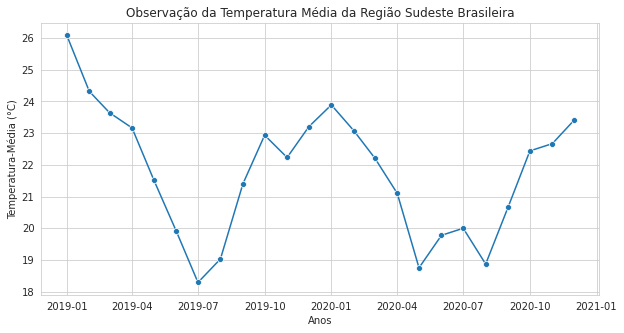

In [19]:
# resposta da questão 3.1.b
# Gerando o gráfico da temperatura média:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=df_final,x='referencia',y='temp-media', marker='o')
  grafico.set(title='Observação da Temperatura Média da Região Sudeste Brasileira', xlabel='Anos', ylabel='Temperatura-Média (°C)')
  grafico.figure.set_size_inches(10,5)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

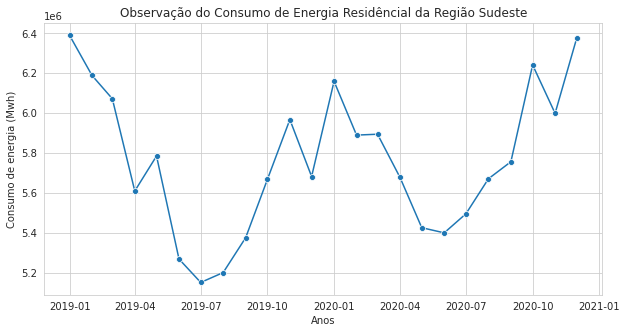

In [26]:
# resposta da questão 3.1.b

# Gerando o gráfico do consumo de energia residencial:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=df_final,x='referencia',y='residencial', marker='o')
  grafico.set(title='Observação do Consumo de Energia Residencial da Região Sudeste', xlabel='Anos', ylabel='Consumo de energia (Mwh)')
  grafico.figure.set_size_inches(10,5)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [28]:
# resposta da questão 3.1.c

# Calculando o coeficiente de Pearson:
coeficiente_pearson = np.corrcoef(x=df_final['residencial'].values, y=df_final['temp-media'].values)
coeficiente_pearson

array([[1.        , 0.82430437],
       [0.82430437, 1.        ]])

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** <br>
Sim, a temperatura é um bom atributo para prever o consumo residencial de energia, pois conforme o coeficiente de Pearson, sua correlação é muito próximo de 1.


### **3.2. Consumo comercial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

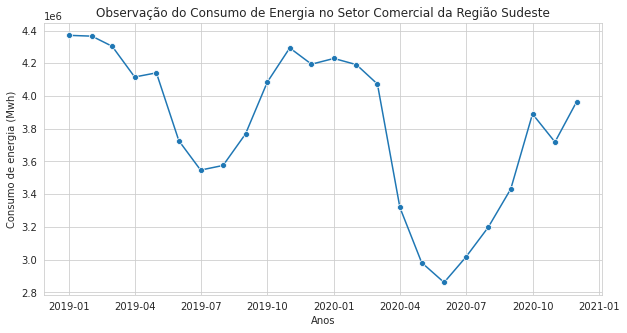

In [37]:
# Gerando o gráfico do consumo comercial:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=df_final,x='referencia',y='comercial', marker='o')
  grafico.set(title='Observação do Consumo de Energia no Setor Comercial da Região Sudeste', xlabel='Anos', ylabel='Consumo de energia (Mwh)')
  grafico.figure.set_size_inches(10,5)


In [34]:
# Calculando o coeficiente de Pearson para observação a relação (consumo de energia x temperatura):
coeficiente_pearson = np.corrcoef(x=df_final['comercial'].values, y=df_final['temp-media'].values)
coeficiente_pearson

array([[1.        , 0.82341129],
       [0.82341129, 1.        ]])

Conforme o coeficiente de Pearson, é possível observar que existe uma relação entre a temperatura e o consumo de energia elétrica no setor comercial da região sudeste brasileira. Pois, seu coeficiente está muito próximo de 1 (ou seja, 0.82...), isso indicando haver relação entre as duas variáveis.

### **3.3. Consumo industrial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

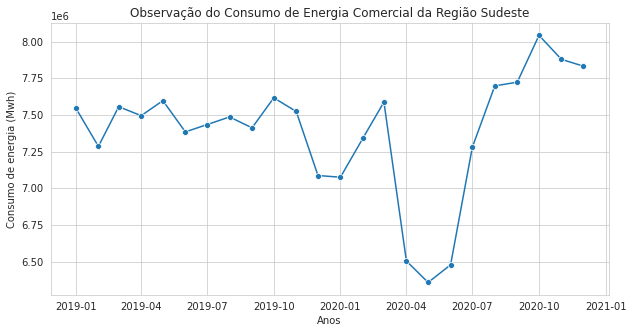

In [36]:
# Gerando o gráfico do consumo industrial:
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data=df_final,x='referencia',y='industrial', marker='o')
  grafico.set(title='Observação do Consumo de Energia Comercial da Região Sudeste', xlabel='Anos', ylabel='Consumo de energia (Mwh)')
  grafico.figure.set_size_inches(10,5)



In [35]:
# Calculando o coeficiente de Pearson para observação a relação (consumo de energia x temperatura):
coeficiente_pearson = np.corrcoef(x=df_final['industrial'].values, y=df_final['temp-media'].values)
coeficiente_pearson

array([[1.        , 0.28747736],
       [0.28747736, 1.        ]])

Conforme o coeficiente de Pearson, é possível afirmar que não há relação entre as variáveis de temperatura e consumo de energia elétrica do setor industrial. Visto que, sua correlação é muito próximo de zero (ou seja, 0.29).

---